In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import special, stats, integrate

In [3]:
from code.series import series_x_mu_b0
from code.series import series_x_mu_b0_pos
from code.series import series_x_mu_b0_pos_robust
from code.series import asymtotic_x_mu_b0_neg
from code.series import asymptotic_alpha_b0

In [282]:
alpha = 8.8
beta = 0
mu = 0.00102
delta = 15.021
x = 0.1

In [283]:
alpha * delta

132.18480000000002

In [284]:
x - mu, delta*alpha, alpha / delta

(0.09898000000000001, 132.18480000000002, 0.5858464815924372)

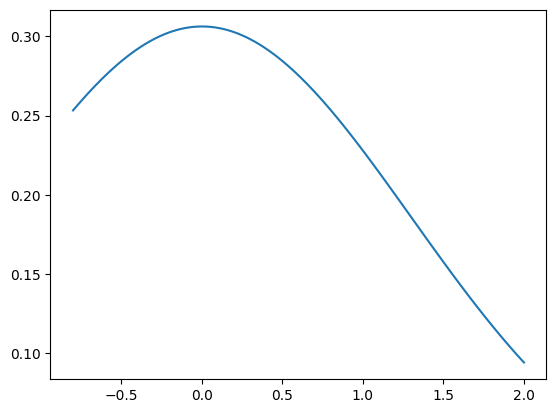

In [285]:
xx = np.linspace(-0.8, 2, 100)
plt.plot(xx, stats.norminvgauss.pdf(xx, a=alpha*delta, b=beta*delta, loc=mu, scale=delta))
plt.show()

In [270]:
stats.norminvgauss.cdf(x, a=alpha*delta, b=beta*delta, loc=mu, scale=delta)

0.5545528870293996

In [271]:
series_x_mu_b0(x, alpha, mu, delta, maxiter=200, eps=1e-16)

(0.5545528870294041, 7)

In [272]:
# %%timeit
series_x_mu_b0_pos(x, alpha, mu, delta, maxiter=300, eps=1e-16)

(0.5545528870294021, 7)

In [273]:
# %%timeit
series_x_mu_b0_pos_robust(x, alpha, mu, delta, maxiter=10000, eps=1e-16)

(0.5545528870294021, 5)

In [83]:
R = 1
series_x_mu_b0_pos_robust(x * R, alpha / R, mu * R, delta * R, maxiter=10000, eps=1e-16)

(0.9962281954937962, 691)

In [84]:
1.0 - series_x_mu_b0_pos(-x, alpha, -mu, delta, maxiter=300, eps=1e-15)[0]

2.0

In [93]:
asymptotic_alpha_b0(x, alpha, mu, delta, eps=1e-3)

1 3.2009452135529144
2 0.01220754307856445
3 0.05915052119024291
4 0.0669058057772695
5 3.3581502465627047
6 31.3017610524253
7 228.1181996898417
8 13024.438803455094
9 227634.2377705752
10 32929.65031190086
11 159712151.23116252
12 6837941707.773194
13 164498363000.56552
14 225652796460.27463
15 241409257864499.75
16 1.6937549931807648e+16
17 7.588329351809332e+17
18 2.068381934149535e+19
19 2.759210069858186e+20
20 9.041770391363579e+22
21 8.151952297308936e+24
22 5.2311832498705064e+26
23 2.4402991207633953e+28
24 4.499546210186982e+29
25 7.027962962358093e+31
26 1.1945624506570638e+34
27 1.2353588737316213e+36
28 1.004350177066278e+38
29 6.359109034907756e+39
30 2.24507014383254e+41
31 1.6539232548142876e+43
32 4.8974890689386915e+45
33 7.174297836737704e+47
34 8.249883165570565e+49
35 7.936089055033496e+51
36 6.081044377314475e+53
37 2.5808098334028966e+55
38 2.582916901077279e+57
39 9.270748209721241e+59
40 1.7066581609062356e+62
41 2.5094835860896867e+64
42 3.1754918523339933e+6

/home/gui/projects/nig/normal-inverse-gaussian/code/series.py:280: RuntimeWarning: overflow encountered in scalar multiply
  # ck2 = ((k - 1) * c1 * (xmu**2 - 4*b*(k - 2) - 3*b) - (2*(k - 2)**2 + k - 2) * c0) / (2*b**2 * (k - 1) * (k))
/home/gui/projects/nig/normal-inverse-gaussian/code/series.py:280: RuntimeWarning: invalid value encountered in scalar subtract
  # ck2 = ((k - 1) * c1 * (xmu**2 - 4*b*(k - 2) - 3*b) - (2*(k - 2)**2 + k - 2) * c0) / (2*b**2 * (k - 1) * (k))
/home/gui/projects/nig/normal-inverse-gaussian/code/series.py:289: RuntimeWarning: overflow encountered in scalar multiply
  else:


(nan, 199)

In [86]:
aa = np.array([
4337.65080731929,
5810969.79668592,
972699524.337313,
5529274039889.426,
4613705067320761.0,
2.486706291478932e+18,
8.934409419707112e+21,
8.545811798791736e+24,
5.983612904201487e+25,
1.2588539177779772e+31,
2.117723970364492e+34,
1.8293037458490087e+37,
8.295187152185425e+38,
2.717731026352441e+43,
5.439001284669284e+46,
6.504523811379845e+49,
4.447034865831982e+52
])

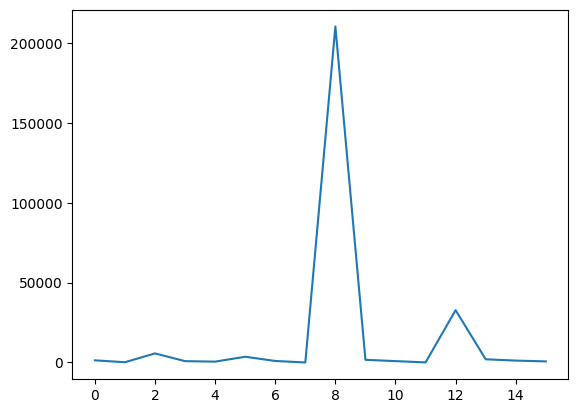

In [87]:
plt.plot(aa[1:] / aa[:-1])

In [387]:
2/((delta/alpha) * np.arange(2, 16)) - 1/((delta/alpha)**2 * np.arange(2, 16))

array([-1094.44582475,  -729.63054983,  -547.22291238,  -437.7783299 ,
        -364.81527492,  -312.69880707,  -273.61145619,  -243.21018328,
        -218.88916495,  -198.99014995,  -182.40763746,  -168.37628073,
        -156.34940354,  -145.92610997])

In [388]:
asymtotic_x_mu_b0_neg(-x, alpha, -mu, delta, eps=1e-8)

/home/gui/projects/nig/normal-inverse-gaussian/code/series.py:216: RuntimeWarning: overflow encountered in scalar multiply
  s += num * knn
/home/gui/projects/nig/normal-inverse-gaussian/code/series.py:216: RuntimeWarning: invalid value encountered in scalar add
  s += num * knn
/home/gui/projects/nig/normal-inverse-gaussian/code/series.py:215: RuntimeWarning: overflow encountered in scalar multiply
  num *= -woa * oxmu2 * (2 * k - 1)


(-1, 200)

In [95]:
from mpmath import *

In [390]:
mp.dps = 50

def fun_k0(t):
    C = sqrt(2) * delta * exp(delta * alpha) / pi
    r = exp(sqrt(2) * (x - mu) * t)
    w = sqrt(2 * ((x - mu) ** 2 + delta ** 2)) * sqrt(alpha ** 2 / 2 + t** 2)
    q = besselk(0, w)
    return C * r * q

quad(fun_k0, [0, inf])

mpf('0.75446211444966825111447929805119243581973944313213231')

In [100]:
mp.dps = 100

def normcdf(x):
    return erfc(-x / sqrt(2)) / 2

def fun_phi(t):
    C = delta / sqrt(2 * pi)
    return C * normcdf((x - mu) / sqrt(t)) * t ** (-3/2) * exp(-(delta - alpha * t) ** 2 / 2 / t)

alpha = mpmathify(alpha)
mu = mpmathify(mu)
delta = mpmathify(delta)
x = mpmathify(x)

quad(fun_phi, [0, inf])

mpf('0.996228195493847729055627164450953363535865333080443190706989629383794177692787447785743882684575060883')

In [392]:
quad(fun_phi, [0, 1])

mpf('0.7544621144496695879632801922077685901884189736740918450042253966516245885921370383133683165869921209949')

Alternative integral representation

In [393]:
def fun_phi2(u):
    C = delta * exp(delta * alpha) / sqrt(2*pi)
    return C * 2 * normcdf((x-mu)*u) * exp(-delta**2/2 * u**2) * exp(-alpha**2/2/u**2)

quad(fun_phi2, [0, inf])

mpf('0.7544621144496695879632801922077685901884189736740918450042253966516245885921370383133683165869921209949')

In [394]:
mp.dps = 50

omega = sqrt(delta**2 + (x-mu)**2)

s = 0
z = (x-mu)**2 * alpha / omega

for k in range(50):
    r = z**k / fac2(2*k + 1)
    q = besselk(k+1, alpha * omega)
    s += r * q
    
print(s)
s *= (x-mu) * alpha / omega

3.8212133642941114641654442422751893024066923154884e-23


In [395]:
C = delta * exp(delta * alpha) / pi
s * C + 1/2

mpf('0.75446211444966958796328019220776859018841897367409426')

In [396]:
b = alpha * omega

s = 0
for k in range(10):
    s += z**k * besselk(k+1, alpha * omega) / fac2(2*k + 1)
    print(s)


3.2468577885928652919450145918262849301744574489863e-23
3.7664756534467878550160509749312873665926397921791e-23
3.8173665681118535044307321452644783140333263557571e-23
3.8209977198326537379489849423384705281705410818037e-23
3.8212032467501164704835387396799015752866498346902e-23
3.8212129539274506299938190335176801629897518197633e-23
3.8212133495663748150052658760654442013095279312817e-23
3.8212133638181474707629851776505556864310772382647e-23
3.8212133642800699453111868011157294260829312814384e-23
3.8212133642937291668779621441086874771298458837436e-23


In [397]:
y0 = 0
y1 = besselk(1, b)
y2 = y1 + z * besselk(2, b) / 3

y = [y0, y1, y2]

for n in range(20):
    num = -(b*z**2*y[n] -z*(-12 -14*n -4*n**2 + b*z) * y[n+1] - (3+2*n) * (5*b + 2*n*b + 4*z + 2*n*z)*y[n+2])
    den = ((3+2*n)*(5+2*n)*b)
    yn = num / den
    # print(num, den)
    y.append(yn)


In [398]:
y[-1]

mpf('3.8212133642941114641654442422751881753495096003816664e-23')

In [399]:
C = delta * exp(delta * alpha) / pi
y[-1] * C * (x-mu) * alpha / omega + 1/2

mpf('0.75446211444966958796328019220776851513546419778900785')

In [400]:
k = 11

(3 + 2*k) * ((5 + 2*k) * alpha * omega + 2*(2+k)) / ((3 + 2*k) * (5 + 2*k) * alpha * omega)

mpf('1.0192367970273326248700851043728070337545476305903615')

In [401]:
k = 11
tp = ((x-mu)**2 * alpha / omega)**k / fac2(2*k + 1) * besselk(k+1, alpha * omega)

In [402]:
k = 12
tp1 = ((x-mu)**2 * alpha / omega)**k / fac2(2*k + 1) * besselk(k+1, alpha * omega)

In [403]:
C = abs(tp1 / tp)

In [404]:
C

mpf('0.023815867970023516857080501659353911052230006095316676')

In [405]:
k = 7
tp = ((x-mu)**2 * alpha / omega)**k / fac2(2*k + 1) * besselk(k+1, alpha * omega)
C = (x-mu)**2 * alpha / omega / (2*k + 3) *  besselk(k+2, alpha * omega) /  besselk(k+1, alpha * omega)

In [406]:
besselk(k+2, alpha * omega)

mpf('7.1485069726954936880812278881552154783980404882824824e-23')

In [407]:
mp.gamma(k+2) * 2**(k+1) / (alpha * omega)**(k+2)

mpf('0.0000000052296075423202436198462382573143408964706757668023874')

In [408]:
1 / (alpha * omega * besseli(k+1, alpha * omega))

mpf('1.2246507802454180153826523804101496679960203078713227e-22')

In [409]:
besseli(k+1, alpha * omega), (alpha * omega / 2)**(k+1) / mp.gamma(k+2)

(mpf('163121390671656572729.89081418112815867783859348561007'),
 mpf('3819918.3541817071373322841382600604418757940040450421'))

In [410]:
fac2(2*k + 1) , factorial(2*k + 1) / (factorial(k) * 2**k)

(mpf('2027025.0'), mpf('2027025.0'))

In [411]:
mp.gamma(k + 1)*2**k / fac2(2*k + 1)

mpf('0.31825951825951825951825951825951825951825951825951826')

In [412]:
(factorial(k) * 2**k) ** 2 / factorial(2*k + 1) 

mpf('0.31825951825951825951825951825951825951825951825951826')

In [413]:
sqrt(pi) / 2 * mp.gamma(k+1) / mp.gamma(k + 3/2)

mpf('0.31825951825951825951825951825951825951825951825951759')

In [414]:
sqrt(pi) / 2 * mp.gamma(k+1) / mp.gamma(k + 1/2) / (k + 1/2)

mpf('0.31825951825951825951825951825951825951825951825951826')

In [415]:
mp.gamma(k+1) / mp.gamma(k + 3/2), 1 / sqrt(k + 1/2)

(mpf('0.35911741013389428925242166800200847111378886988835732'),
 mpf('0.36514837167011074230464652186720142263516312999865576'))

In [416]:
tp, 1/2 * sqrt(pi / (k + 1/2)) * ((x-mu) / omega) ** (2*k) / (alpha * omega)

(mpf('1.4251772655757719301585111485121549306982978020874877e-31'),
 mpf('3.9210627479769157542765850122825062703317345297424862e-17'))

In [417]:
besselk(k+2, alpha * omega) /  besselk(k+1, alpha * omega)

mpf('1.1822012298139087722248822522818195917229312388166876')

In [418]:
(k+2 - 1/2 + sqrt((k+2-1/2)**2 + (alpha * omega)**2)) / (alpha * omega)

mpf('1.1841155975198032941857053331022994933855106611459221')

In [419]:
(k+1 + sqrt((k+1)**2 + (alpha * omega)**2)*(k+1)/k) / (alpha * omega)

mpf('1.3171729865278467640660062804765700463346415260804779')

In [420]:
2*(k+1)/(alpha * omega) + alpha * omega / (2*(k+1 - 1))

mpf('3.8952256030177593534403134929887320998074993161510062')

In [421]:
1 + ((k+1) + 1/2) / (alpha * omega)

mpf('1.1698017276066475926032512097522774710257185084803049')

In [422]:
float(abs(tp) / (1 - C))

1.4729168276836801e-31

In [268]:
C

mpf('0.95668775572332147965669762451194698258815932964914538')

In [158]:
float(sum(((x-mu)**2 * alpha / omega)**k / fac2(2*k + 1) * besselk(k+1, alpha * omega) for k in range(11, 30)))

9.692074280496372e-38

In [104]:
(x-mu)**2 * alpha / omega * fac2(2*k + 1) / fac2(2*(k-1) + 1) * besselk(k+1, alpha * omega) / besselk(k, alpha * omega)

mpf('1866230.6829720216341880144726420436427690051333801994')

mpf('0.00071581961345740873299928418038654259126700071581961321')

In [111]:
 besselk(k, alpha * omega) / besselk(k+1, alpha * omega) * fac2(2*(k-1) + 1) / fac2(2*k + 1)

mpf('0.0000025318675114938183790976010935617672171091893051784088')

In [261]:
special.erfc(-(x-mu)/np.sqrt(2)/np.sqrt(delta/alpha))

1.0414323707533917

In [18]:
mp.dps = 100

def fun_k1(t):
    C = alpha * delta / pi
    r = sqrt(delta ** 2 + (t - mu) ** 2)
    return C * besselk(1, alpha * r) / r * exp(delta * alpha)

print(quad(fun_k1, [-inf, x]))

mp.dps = 50

0.000000000002671296348822753608404042605394311922554930937587186352434722231076156654363482158410658748064487048


Expansion

In [96]:
mp.dps = 50

In [374]:
b = delta / alpha
a = (x-mu) / sqrt(2)

In [383]:
y0 = 1/2 * erfc(-a / sqrt(b))
y1 = -1/2 * a * exp(-a**2 / b) / sqrt(pi) / b ** (3/2)

yy = [y0, y1]
N = 10

yy = [1, 1]
a=0
b=1

for n in range(0, N):
    yn = ((n + 1) * yy[n+1] * (2*a**2 - 4*b*n - 3*b) - (2*n**2 + n) * yy[n]) / (2*b**2 * (n+1) * (n+2))
    yy.append(yn)

In [384]:
yy

[1,
 1,
 -0.75,
 0.625,
 -0.546875,
 0.4921875,
 -0.451171875,
 0.4189453125,
 -0.39276123046875,
 0.370941162109375,
 -0.35239410400390625,
 0.3363761901855469]

In [377]:
b

1.706931818181818

In [378]:
normcdf((x-mu)/sqrt(b)), normcdf((x-mu)/sqrt(b/2))

(mpf('0.5301949381198521271530769081056641972364539107611333381556312140143987366146371305600370881090772683083'),
 mpf('0.54266130881412137671351061033121577265606303352622579134329545772202009055329199055828965123071240433'))

In [379]:
abs(float(yy[1]*27/24 / b**2)), abs(float(yy[2]))

(0.003408608347402952, 0.0038714204128932096)

In [380]:
abs(float(yy[1]*65/64 / b**3)), abs(float(yy[3]))

(0.0018027760900614037, 0.0018864295674779984)

In [381]:
for k in range(len(yy)):
    bound = yy[1] / b **k
    print(k, abs(float(yy[k])), abs(float(bound)), float(yy[k] / bound))

0 0.5301949381198521 0.008827890319338947 -60.05907628444055
1 0.008827890319338947 0.00517178848346866 1.706931818181818
2 0.0038714204128932096 0.003029874086580402 -1.2777496035363636
3 0.0018864295674779984 0.0017750410732912283 1.0627526291435256
4 0.0009651604414968735 0.0010399015674697296 -0.9281267301532059
5 0.0005079164133350706 0.0006092226745046017 0.8337122608709373
6 0.0002722408351286176 0.0003569109603648555 -0.7627696130438721
7 0.00014781466483291647 0.00020909503037152844 0.7069257675338981
8 8.102836803380921e-05 0.00012249758786162375 -0.6614690905207115
9 4.47467146172712e-05 7.176478085229274e-05 0.6235191424797842
10 2.485602958148129e-05 4.204314436456801e-05 -0.5912029168405584
11 1.3873138405394646e-05 2.4630828201065077e-05 0.563242871581344


In [ ]:
z = alpha ** 2 / 2
l = -1/2
xi = b * z

In [ ]:
Q = [2 * xi ** l * besselk(l, 2 * xi), 0, 2 * xi ** (l + 2) * (-besselk(l, 2 * xi) + besselk(l+2, 2 * xi))]

for k in range(1, N):
    qn = (k + l + 1 - 2 * xi) * Q[k+1] + xi * (2 * k + l + 1) * Q[k] + k * xi ** 2 * Q[k-1]
    Q.append(qn)

In [ ]:
s = 0
for k in range(N):
    s += yy[k] * Q[k] / z ** k

s * z **(-l) * delta * exp(delta * alpha) / sqrt(2 * pi)